# **Regression Ridge**

La [regression Ridge](http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/2020-02-07_sklapi.html) est une régression linéaire avec une contrainte quadratique sur les coefficients. C’est utile lorsque les variables sont très corrélées, ce qui fausse souvent la résolution numérique.

On l'utilise en raison du fait que la régression linéaire n'a pas donnée de bons résultats.

#Sommaire :     

1.[Import des jeux de données](#Imports)

2.[Regression linéaire sur les émissions de CO2](#CV)

3.[Regression linéaire sur l'utilisation d'énergie](#hp)



<a name="Imports"></a>
## **Import des jeux de données et choix de la méthode** :


In [ ]:
from ast import literal_eval 

import numpy as np
 
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

import statistics
import re
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
X_train = pd.read_csv('/content/drive/MyDrive/X_trainlog.csv',sep='\t')
X_test = pd.read_csv('/content/drive/MyDrive/X_testlog.csv',sep='\t')

Mounted at /content/drive


In [ ]:
MetCO2 = pd.read_csv('/content/drive/MyDrive/MetC02_Reglin.csv',sep='\t')
MetEn = pd.read_csv('/content/drive/MyDrive/MetEn_Reglin.csv',sep='\t')

On importe nos librairies:

On importe à partir de SkLearn les librairies pour les régressions de Rige,Lasso, ElasticNet(combinant Lasso et Ridge).

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

In [ ]:
import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)
from warnings import filterwarnings
filterwarnings('ignore')

On importe nos jeux d'entrainement et de test. Ensuite on va tester les hyperparamètres pour voir laquelle des régression de Ridge, Lasso ou Elastic Net donne de meilleures performances.

In [ ]:
Y_train = pd.read_csv('/content/drive/MyDrive/Y_trainlog.csv',sep='\t')
Y_test = pd.read_csv('/content/drive/MyDrive/Y_testlog.csv',sep='\t')

In [ ]:
for col in X_train:
  mean_value= X_train[col].mean() 
  
  X_train[col].fillna(value=mean_value, inplace=True) 

In [ ]:
for col in X_test:
  mean_value= X_test[col].mean() 
  
  X_test[col].fillna(value=mean_value, inplace=True) 


In [ ]:
# K-fold Root Mean Square Error Cross Validation
n_folds=5
def k_rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train['TotalGHGEmissions'], scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
# Définition des modeles
model_ridge = Ridge()
model_lasso = Lasso()
model_elasticNet = ElasticNet(l1_ratio=0.5)

# Optimisation des hyperparameteres
# On prend alpha comme hyperparametre lambda. 
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

# Validation croisée
cv_ridge = [k_rmsle_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_lasso = [k_rmsle_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

cv_elasticNet = [k_rmsle_cv(ElasticNet(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_elasticNet = pd.Series(cv_elasticNet, index = alphas)


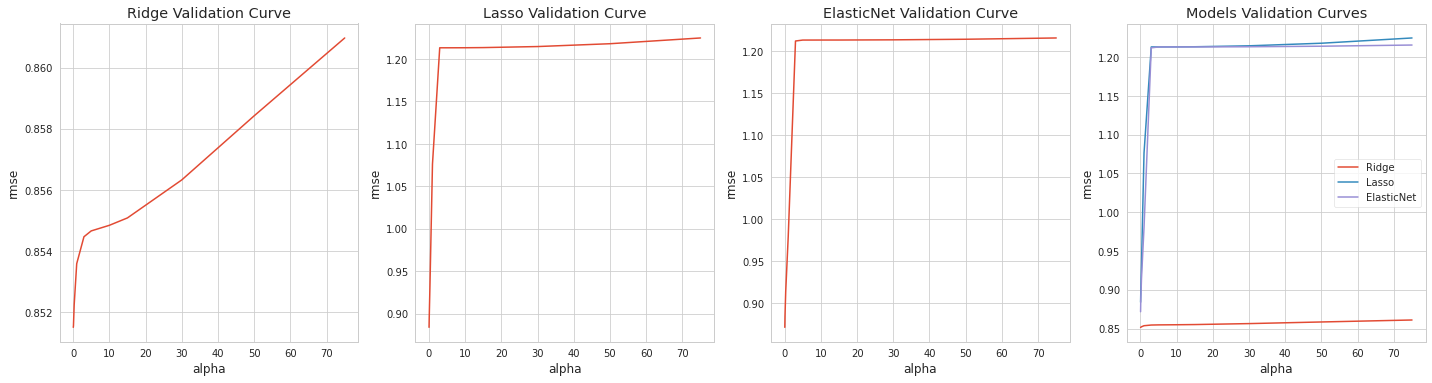

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(241)
cv_ridge.plot(title = "Ridge Validation Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_lasso = pd.Series(cv_lasso, index = alphas)
plt.subplot(242)
cv_lasso.plot(title = "Lasso Validation Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_elasticNet = pd.Series(cv_elasticNet, index = alphas)
plt.subplot(243)
cv_elasticNet.plot(title = "ElasticNet Validation Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

plt.subplot(244)
cv_ridge.plot()
cv_lasso.plot()
cv_elasticNet.plot()
plt.legend(labels=['Ridge','Lasso','ElasticNet'])
plt.title('Models Validation Curves')
plt.xlabel("alpha")
plt.ylabel("rmse")

plt.tight_layout()

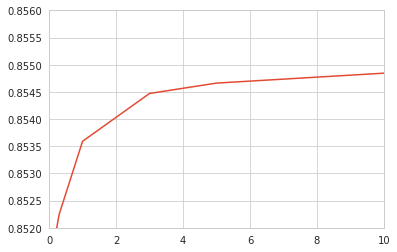

In [ ]:
plt.xlim(0,10)
plt.ylim(0.852,0.856)

cv_ridge.plot()

On voit que le modèle de regression Ridge donne les meilleurs résultats et on va prendre le paramètre alpha=1 qui nous retourne un rmse de 0.8535

<a name="CV"></a>
## **Regression ridge sur les émissions de CO2**

In [ ]:
import sklearn
from sklearn.linear_model import Ridge

sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

Ridge(normalize=False)

In [ ]:
ridge_model = Ridge(fit_intercept=False) # Without intercept
ridge_model.fit(X_train, Y_train['TotalGHGEmissions'])
rm=ridge_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import timeit 
start_time=timeit.default_timer()
from sklearn.metrics import r2_score


In [ ]:

Y_pred = rm.predict(X_test)
MSE_rm=mean_squared_error(Y_test['TotalGHGEmissions'],Y_pred)
print('Notre MSE est égal à %0.2f' %MSE_rm)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE= mean_absolute_percentage_error(Y_test['TotalGHGEmissions'], Y_pred) * 100

print('MAPE :' ,round(MAPE,2), '%')
# Evaluation du training set

rmtime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(rmtime,2))   
rmse_rm = (np.sqrt(mean_squared_error(Y_test['TotalGHGEmissions'], Y_pred)))
r2_rm= r2_score(Y_test['TotalGHGEmissions'], Y_pred)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_rm))
print('le score R2 coeff de determination est de %0.2f' %(r2_rm))
#print('\n')
print('MSE Train Score :', round((rm.score(X_train,Y_train['TotalGHGEmissions'])),2))
print('MSE Test Score :', round((rm.score(X_test,Y_test['TotalGHGEmissions'])),2))

Notre MSE est égal à 0.94
MAPE : 42.28 %
Voici le temps de calcul en ms 0.03
RMSE est 0.9713245067231221
le score R2 coeff de determination est de 0.62
MSE Train Score : 0.7
MSE Test Score : 0.62


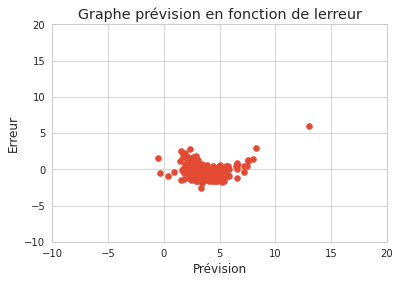

In [ ]:
erreur=Y_pred-Y_test['TotalGHGEmissions'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()


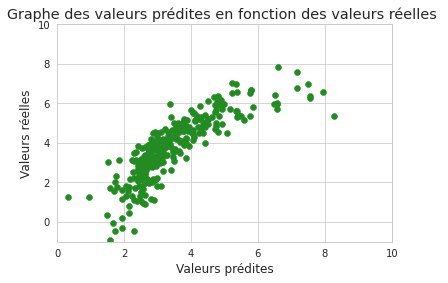

In [ ]:
plt.figure()
plt.scatter(Y_pred,Y_test['TotalGHGEmissions'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(0,10)
plt.ylim(-1,10)
plt.show()

<a name="hp"></a>
##Regression ridge sur l'utilisation d'énergie

In [ ]:
ridge_model = Ridge(fit_intercept=False) # Without intercept
ridge_model.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
rm=ridge_model

In [ ]:
Y_pred_bis = rm.predict(X_test)
MSE_rm_bis=mean_squared_error(Y_test['SiteEnergyUse(kBtu)'],Y_pred_bis)
print('Notre MSE est égal à %0.2f' %MSE_rm)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE_bis= mean_absolute_percentage_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis) * 100
print('MAPE :' ,round(MAPE_bis,2), '%')
# Evaluation du training set

lineartime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(lineartime,2))   
rmse_rm_bis = (np.sqrt(mean_squared_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)))
r2_rm_bis= r2_score(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_rm_bis))
print('le score R2 coeff de determination est de %0.2f' %(r2_rm_bis))
#print('\n')
print('MSE Train Score :', round(rm.score(X_train,Y_train['SiteEnergyUse(kBtu)'])),2)
print('MSE Test Score :', round(rm.score(X_test,Y_test['SiteEnergyUse(kBtu)'])),2)

Notre MSE est égal à 0.94
MAPE : 4.17 %
Voici le temps de calcul en ms 0.68
RMSE est 0.7837899294674762
le score R2 coeff de determination est de 0.66
MSE Train Score : 1 2
MSE Test Score : 1 2


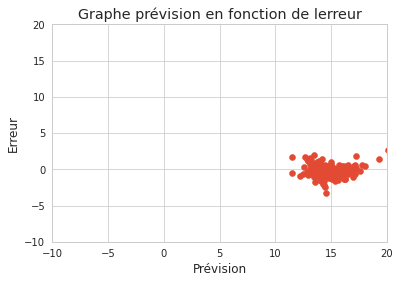

In [ ]:
erreur=Y_pred_bis-Y_test['SiteEnergyUse(kBtu)'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred_bis,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()


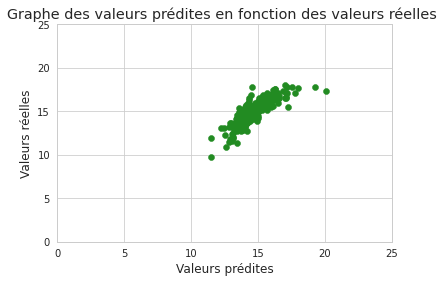

In [ ]:
plt.figure()
plt.scatter(Y_pred_bis,Y_test['SiteEnergyUse(kBtu)'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(0,25)
plt.ylim(0,25)
plt.show()

In [ ]:
new_row = {'MSE': MSE_rm, 'R2': r2_rm, 'time': rmtime}
MetCO2 = MetCO2.append(new_row, ignore_index=True)



On en conclut que la régression Ridge donne de meilleurs résultats que la régression linéaire, mais nous allons voir par la suite des modèles non linéaires pour avoir de meilleurs performances.

In [ ]:
new_row1 = {'MSE': MSE_rm_bis, 'R2': r2_rm_bis, 'time': rmtime}
MetEn = MetEn.append(new_row, ignore_index=True)




In [ ]:
MetCO2.to_csv("/content/drive/MyDrive/MetC02_RegRidge.csv", sep='\t')
MetEn.to_csv("/content/drive/MyDrive/MetEn_RegRidge.csv", sep='\t')